### Question 1:  Review the Titanic data(60)

In lecture 3, we use Titanic data as the example for data pre-processing. This dataset contains information about passengers on the Titanic, including features like age, gender, class, and whether they survived or not. Now we are going to fit this data to the three classification models we have discussed. 

In [10]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


1. Perform the pre-processing steps we have done in the lecture 3, including cleaning the missing values, convert the target (survived) to a categorical variable and split the training and testing data. (10)

In [11]:
from sklearn.model_selection import train_test_split

# Change NaN values in 'deck' column to "Unknown"
titanic_data['deck'] = titanic_data['deck'].astype(str)
titanic_data['deck'] = titanic_data['deck'].replace('nan', 'Unknown')

# remove missing values
rows_with_missing_values = titanic_data[titanic_data.isnull().any(axis=1)]
titanic_data = titanic_data.dropna()

#convert target to categorical variable
titanic_data['survived'] = (titanic_data['survived'] == 1).astype(int)

X = titanic_data.drop(columns = ['survived'])
y = titanic_data.survived
target = y
X_train, X_test, y_train, y_test = train_test_split(X,
                            y, test_size=0.2, random_state=4400)

print(titanic_data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male     deck  embark_town alive 

2. Now only use the age and fare as the features, fit Naive bayes, LDA and QDA model. Report the classification table for each model. Which one performs the best? (20) 

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import warnings
import numpy as np

X = titanic_data[['age', 'fare']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compare accuracies
nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

# generate classification tables
nb_predictions = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_predictions, 
                               target_names=['age', 'fare'])

lda_predictions = lda_model.predict(X_test)
lda_report = classification_report(y_test, lda_predictions, 
                               target_names=['age', 'fare'])

qda_predictions = nb_model.predict(X_test)
qda_report = classification_report(y_test, qda_predictions, 
                               target_names=['age', 'fare'])

print("Naive Bayes accuracy: ", nb_accuracy)
print("Naive Bayes classification table:\n", nb_report)

print("LDA accuracy: ", lda_accuracy)
print("LDA classification table:\n", lda_report)

print("QDA accuracy: ", qda_accuracy)
print("QDA classification table:\n", qda_report)

# LDA seems to perform the best, as it has highest accuracy, while also having a slightly higher precision for both fare and
# age, meaning that it had a higher accuracy of accurate predicitions. It also had a slightly higher F1 score than QDA and naive 
# Baye's, meaning that a higher percentage of positive predictions were correct, so there were less false positives.

Naive Bayes accuracy:  0.6643356643356644
Naive Bayes classification table:
               precision    recall  f1-score   support

         age       0.67      0.90      0.77        88
        fare       0.64      0.29      0.40        55

    accuracy                           0.66       143
   macro avg       0.65      0.59      0.58       143
weighted avg       0.66      0.66      0.63       143

LDA accuracy:  0.6853146853146853
LDA classification table:
               precision    recall  f1-score   support

         age       0.69      0.89      0.78        88
        fare       0.67      0.36      0.47        55

    accuracy                           0.69       143
   macro avg       0.68      0.62      0.62       143
weighted avg       0.68      0.69      0.66       143

QDA accuracy:  0.6643356643356644
QDA classification table:
               precision    recall  f1-score   support

         age       0.67      0.90      0.77        88
        fare       0.64      0.29     

3. Make a data visualization to show the decision boundary for three models. (20)

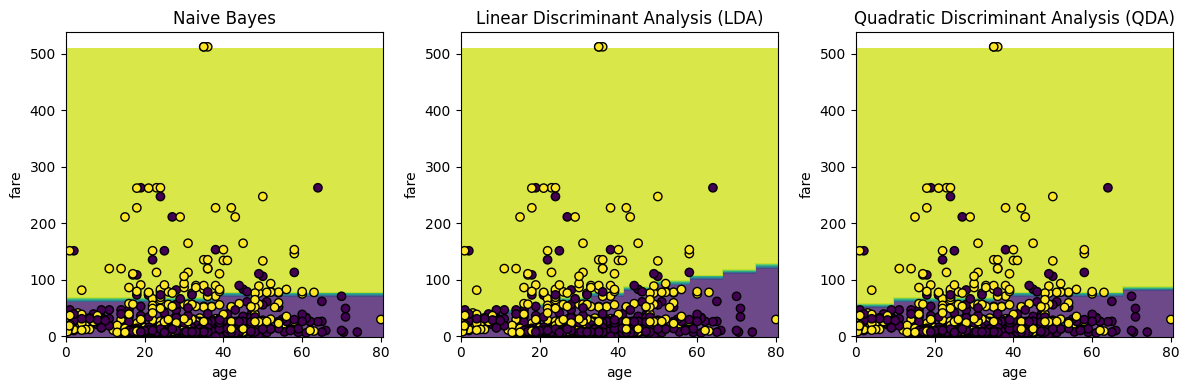

In [13]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X["age"].min() - 0.5, X["age"].max() + 0.5
y_min, y_max = X["fare"].min() - 0.5, X["fare"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 10))

# Make predictions on the meshgrid points for each model
nb_pred = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
lda_pred = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
qda_pred = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])

nb_pred = nb_pred.reshape(xx.shape)
lda_pred = lda_pred.reshape(xx.shape)
qda_pred = qda_pred.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, nb_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=target, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Naive Bayes')

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, lda_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=target, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Linear Discriminant Analysis (LDA)')

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, qda_pred, alpha=0.8)
plt.scatter(X["age"], X["fare"], c=target, edgecolors='k')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Quadratic Discriminant Analysis (QDA)')

plt.tight_layout()
plt.show()

4. Now fit the models again with all variables. Make sure you have convert the categorical variables to factors. Report the classification table for each models. Which one performs the best? (20)

In [34]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')


newdata = pd.get_dummies(titanic_data, columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

print(newdata)

X = newdata.drop(columns = ['survived'])
y = newdata['survived']
      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Fit Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fit LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Fit QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Compare accuracies
nb_accuracy = nb_model.score(X_test, y_test)
lda_accuracy = lda_model.score(X_test, y_test)
qda_accuracy = qda_model.score(X_test, y_test)

# generate classification tables
nb_predictions = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_predictions)

lda_predictions = lda_model.predict(X_test)
lda_report = classification_report(y_test, lda_predictions)

qda_predictions = nb_model.predict(X_test)
qda_report = classification_report(y_test, qda_predictions)

print("Naive Bayes accuracy: ", nb_accuracy)
print("Naive Bayes classification table:\n", nb_report)

print("LDA accuracy: ", lda_accuracy)
print("LDA classification table:\n", lda_report)

print("QDA accuracy: ", qda_accuracy)
print("QDA classification table:\n", qda_report)

# the naive bayes and qda performed the best, and they performed equally as well as each other

     survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0           0       3  22.0      1      0   7.2500       False      True   
1           1       1  38.0      1      0  71.2833        True     False   
2           1       3  26.0      0      0   7.9250        True     False   
3           1       1  35.0      1      0  53.1000        True     False   
4           0       3  35.0      0      0   8.0500       False      True   
..        ...     ...   ...    ...    ...      ...         ...       ...   
885         0       3  39.0      0      5  29.1250        True     False   
886         0       2  27.0      0      0  13.0000       False      True   
887         1       1  19.0      0      0  30.0000        True     False   
889         1       1  26.0      0      0  30.0000       False      True   
890         0       3  32.0      0      0   7.7500       False      True   

     embarked_C  embarked_Q  ...  deck_F  deck_G  deck_Unknown  \
0         False      

### Question 2: Simulation study (10)

In the following simulation study, please write a sentence to discuss what this simulation code is doing and what you have seen in the figure.  

In [1]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(4400)

# Define the range of dataset sizes
noises = np.arange(0,1,0.05)

# Initialize lists to store accuracy and time results
accuracy_nb = []
accuracy_lda = []
accuracy_qda = []

In [3]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

for noise in noises:
    
    # Generate a random classification dataset
    X1 = np.random.normal(5, 1, 1000)
    X2 = np.random.normal(0, 1, 1000)
    X3 = np.random.normal(2, 1, 1000)
    X4 = np.random.normal(-3, 2, 1000)
    X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
    y = np.where(X1 > 5, 'group1', 'group2')

    indices_to_change = np.random.choice(1000, 
                                         size=int(noise * 1000), 
                                         replace=False)

    for index in indices_to_change:
        if y[index] == 'group1':
            y[index] = 'group2'
        else:
            y[index] = 'group1'

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=4400)

    # Fit Naive Bayes model and calculate accuracy and time
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    accuracy_nb.append(nb_model.score(X_test, y_test))

    # Fit LDA model and calculate accuracy and time
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    accuracy_lda.append(lda_model.score(X_test, y_test))
    
    # Fit QDA model and calculate accuracy and time
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    accuracy_qda.append(qda_model.score(X_test, y_test))    

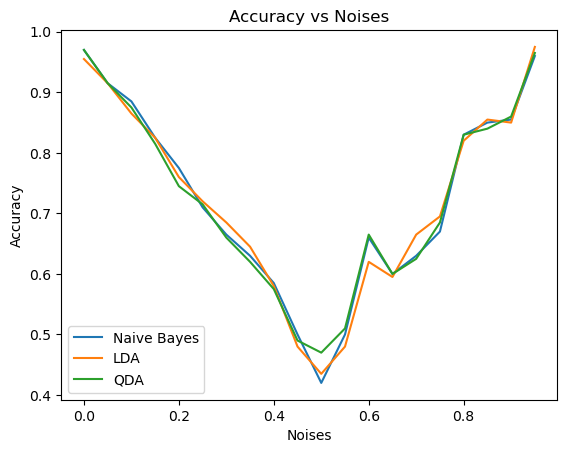

In [4]:
import matplotlib.pyplot as plt

plt.plot(noises, accuracy_nb, label='Naive Bayes')
plt.plot(noises, accuracy_lda, label='LDA')
plt.plot(noises, accuracy_qda, label='QDA')
plt.xlabel('Noises')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Noises')
plt.legend()
plt.show()

The simulation code is storing accuracy results for naive bayes, LDA, and QDA models with varying amounts of noise in the dataset. Four random datasets (X1-X4) are created, as well as two classes (group1 and group2), each dataset is created with some noise, then the data is split into training and testing and the models are trained. The plot shows the accuracy of each of the three models with varying level of noise in the data, it seems that all three are least accurate with noise around 0.5. Overall, it shows how well each model responds to noise in the dataset.

### Question 3: Compare the models (20)

Please summarize the similarity and difference between Naive Bayes, LDA and QDA. Wirte at least three similarities between the models and at least two difference for each model. Hint: think about the how the models are proposed, the assumptions and the decision boundary etc.

Three similarities between Naive Bayes, LDA, and QDA are that they are all used for classification tasks, they're all probabilistic models, meaning they make use of probability distributions to estimate class membership probabilities and they are all generative models, meaning they estimate the joint probability distribution of the features and class labels.

The differences are, Naive Bayes is computationally efficient and requires less training data, and has a strong independence assumption, meaning it handles high-dimensional data well. LDA makes a linear decision boundary and is less prone to overfitting, and QDA makes a quadratic decision boundary and allows different class covariances, but has a potential to overfit.